# Modelo de regresión no lineal

## Metodología
Los pasos a seguir para alcanzar el objetivo son los siguientes:

1. Importación de la base de datos.
2. Análisis de las variables para identificar el tipo de dato.
3. Verificación de valores `NaN` o Nulos.
4. Distribución de las variables.
5. Cálculo de la matriz de correlación.
6. Procesamiento de datos.
7. Resultados y discusión.

## Configuración
### Importación de librerías
Importamos todas las librerías necesarias para trabajar

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [3]:
# 1. Importación de la base de datos
dataset = pd.read_csv('datasets/ground_source_heat_pump.csv')
dataset.head()

,HEM,STC,VWD,WD,UT,WFR,WTD,HTR
0,Release,1.41,100.0,180,3.0,1.15,4.04,53.9
1,Release,1.41,125.0,180,3.0,1.15,4.86,52.0
2,Extraction,1.41,100.0,180,3.0,1.15,3.18,42.4
3,Extraction,1.41,125.0,180,3.0,1.15,3.82,40.7
4,Release,1.46,85.0,130,2.8,1.19,4.19,66.6


In [4]:
# 2. Análisis de las variables para identificar el tipo de dato
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HEM     112 non-null    object 
 1   STC     112 non-null    float64
 2   VWD     112 non-null    float64
 3   WD      112 non-null    int64  
 4   UT      112 non-null    float64
 5   WFR     112 non-null    float64
 6   WTD     112 non-null    float64
 7   HTR     112 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.1+ KB


In [5]:
# 3. Verificación de valores NaN o nulos
dataset.isnull().sum()

HEM    0
STC    0
VWD    0
WD     0
UT     0
WFR    0
WTD    0
HTR    0
dtype: int64

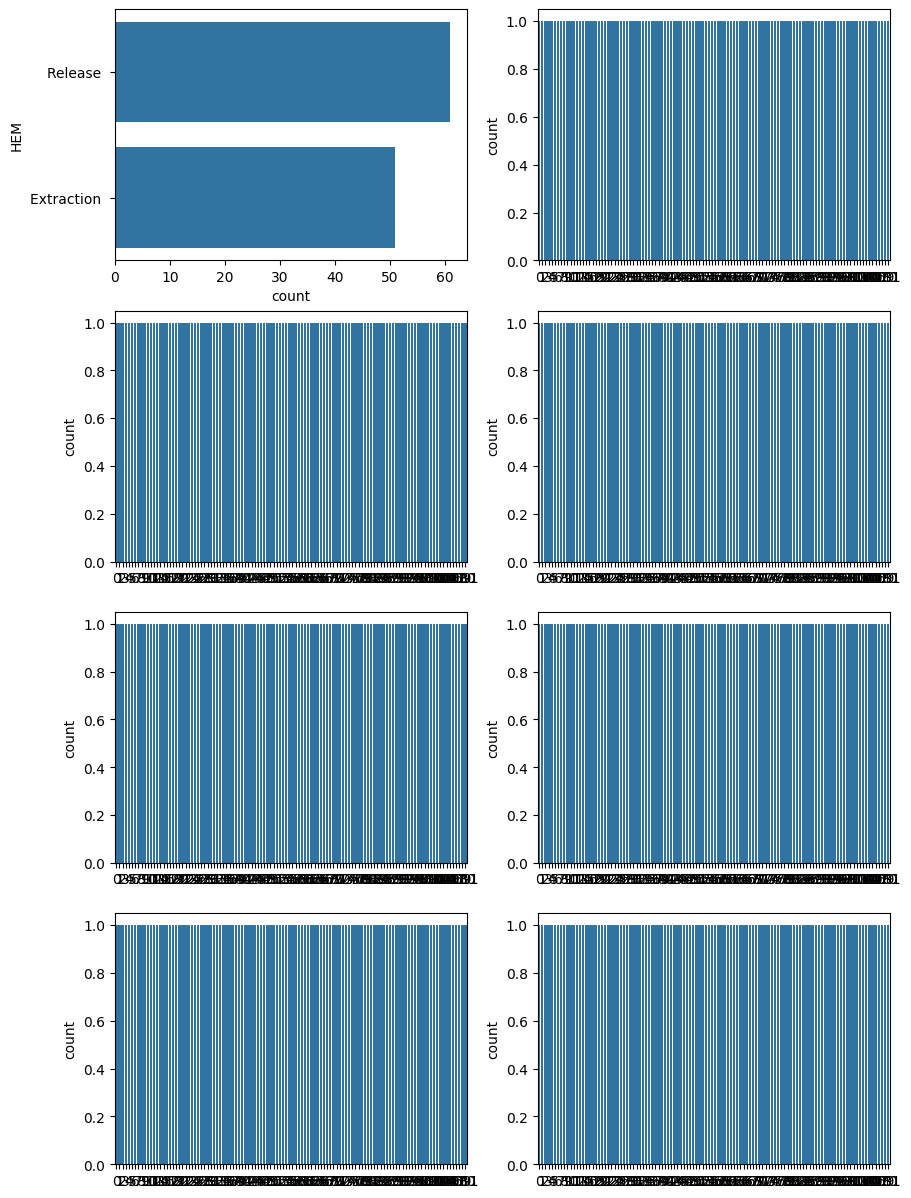

In [6]:
# 4. Distribución de las variables
cols = dataset.columns
fig, axes = plt.subplots(4,2, figsize = (10,15))
k = 0

for i in range(4):
    for j in range(2):
        sns.countplot(dataset[cols[k]], ax = axes[i][j])
        k = k + 1

<Axes: >

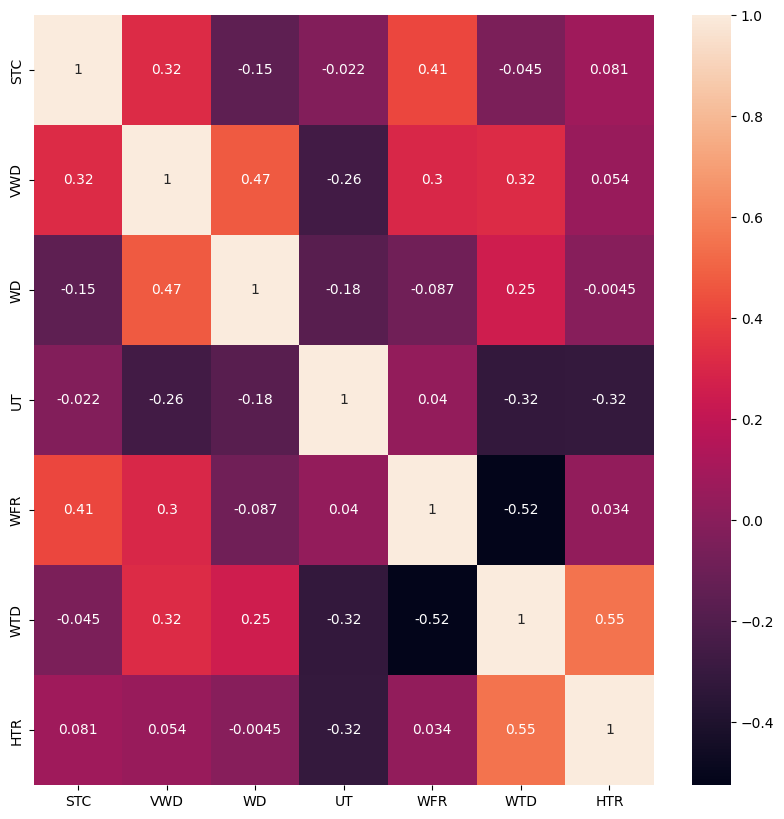

In [7]:
# 5. Cálculo de la matriz de correlación
fig = plt.figure(figsize = (10,10))
sns.heatmap(dataset[dataset.keys().drop('HEM')].corr(), annot = True)

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range = (0.1, 0.9))
X = scaler.fit_transform(dataset[dataset.keys().drop(['HEM','HTR'])])
y = np.asarray(dataset['HTR'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [9]:
#%% Specify the model
model = LinearRegression()

#%% Fit model on the dataset
model.fit(X_train, # input data
            y_train, # target data
            )

In [10]:
#%% Use model to make predictions
# Predict on training data
pred_tr = model.predict(X_train)

# Predict on a test data
pred_te = model.predict(X_test)

In [11]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [12]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train, pred_tr)

r2_train = r2_score(y_train, pred_tr)

mse_test = mean_squared_error(y_test, pred_te)

r2_test = r2_score(y_test, pred_te)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)


---------- Evaluation on Training Data ----------
explained_variance:  0.6811
MAE:  3.8181
MSE:  28.4292
R²:  0.6811

---------- Evaluation on Test Data ----------
explained_variance:  0.5697
MAE:  4.2769
MSE:  50.4522
R²:  0.4752


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0    28.429246    0.681099   50.452247   0.475198
